Saving Zoo.csv to Zoo (1).csv
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
me

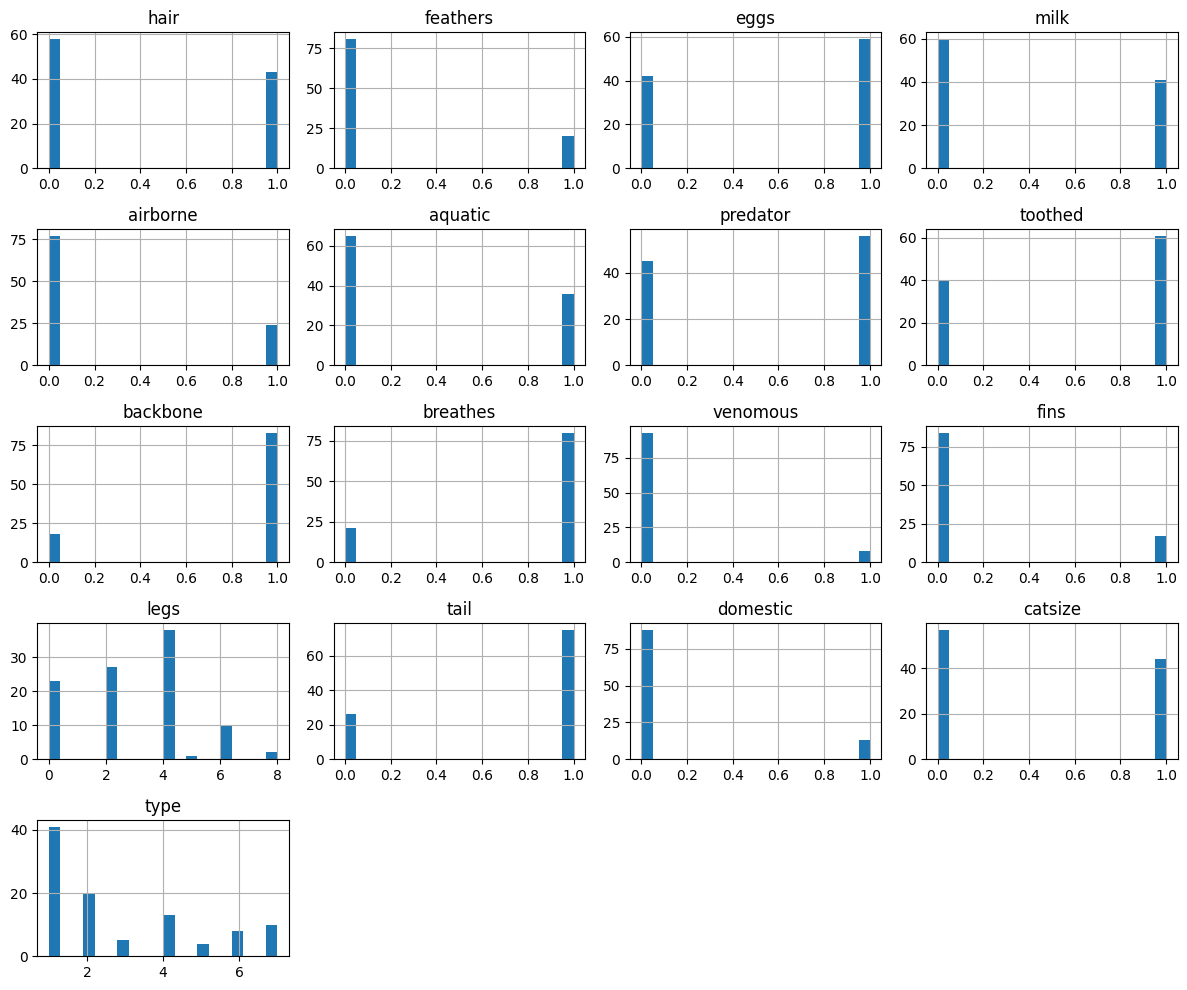

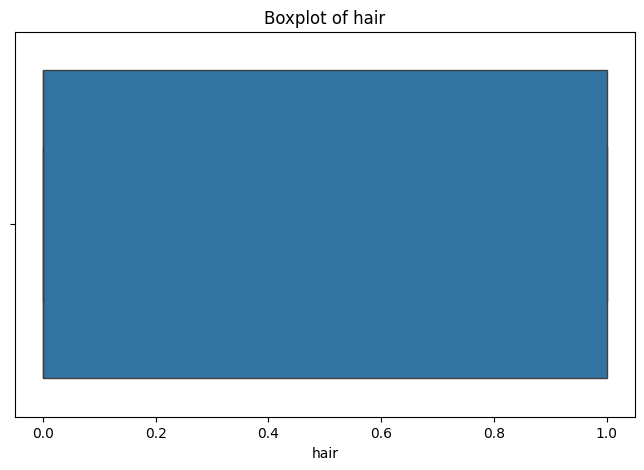

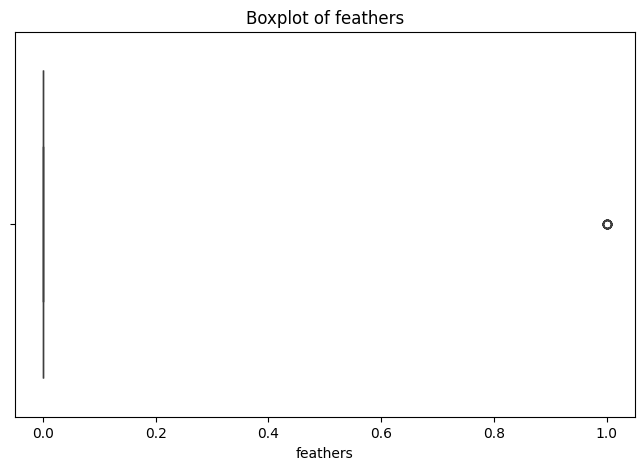

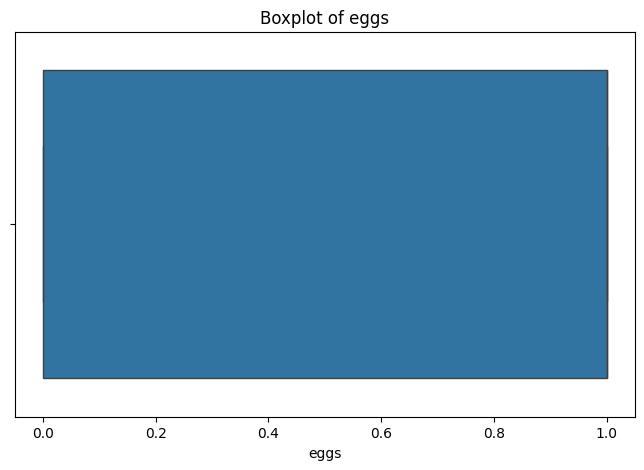

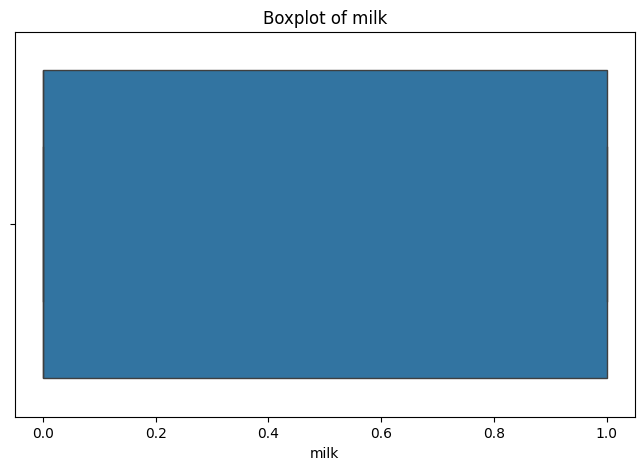

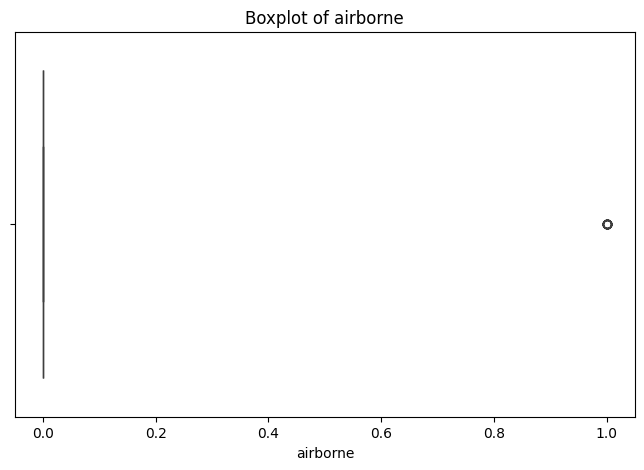

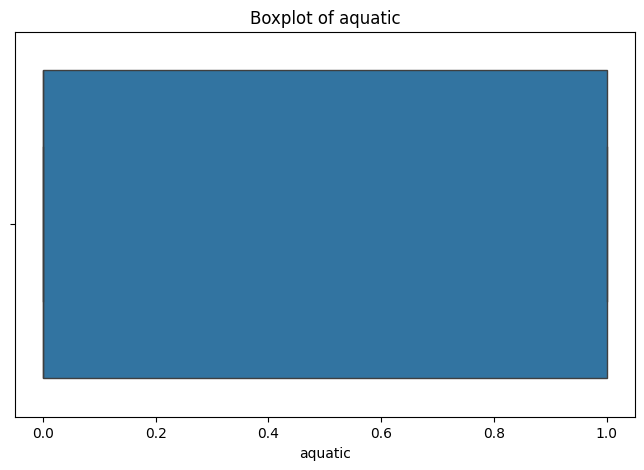

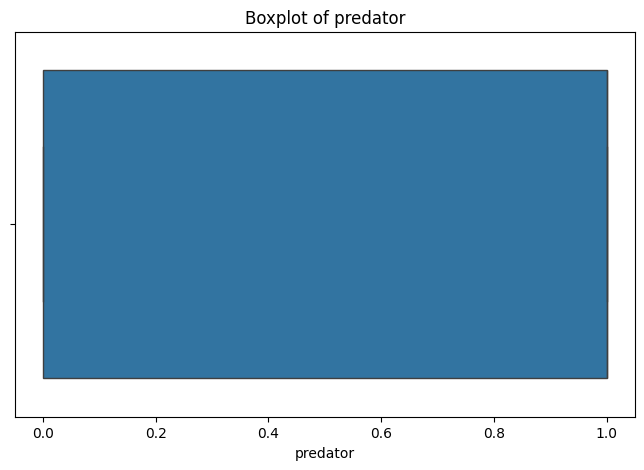

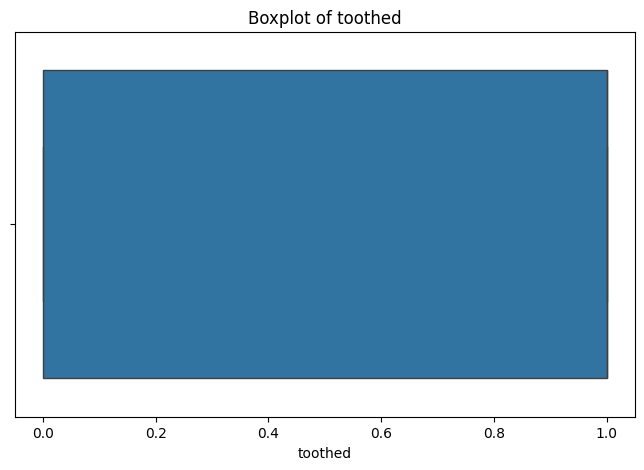

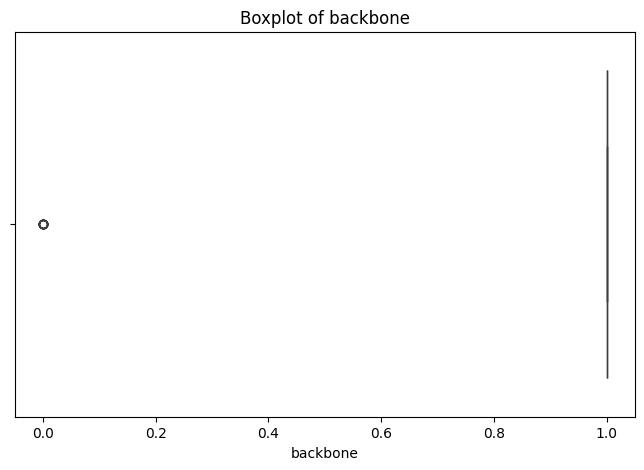

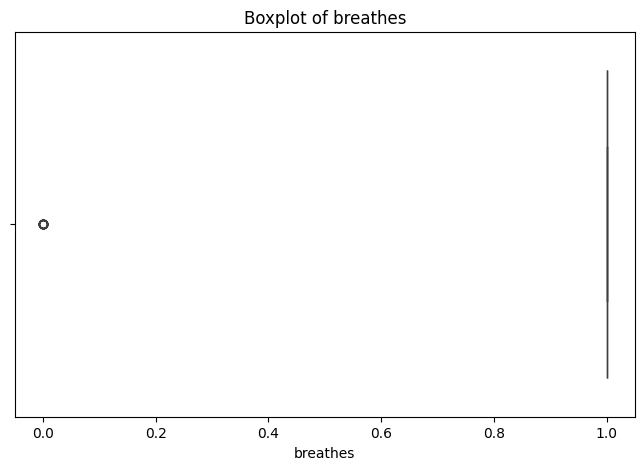

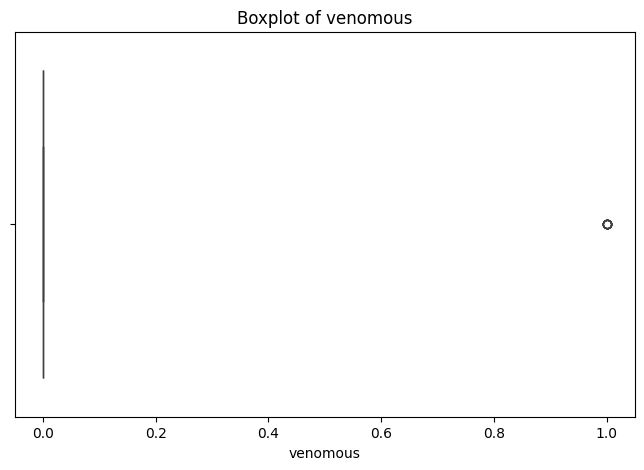

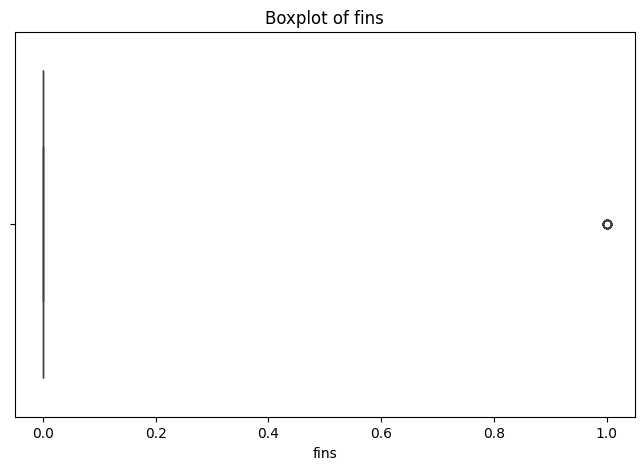

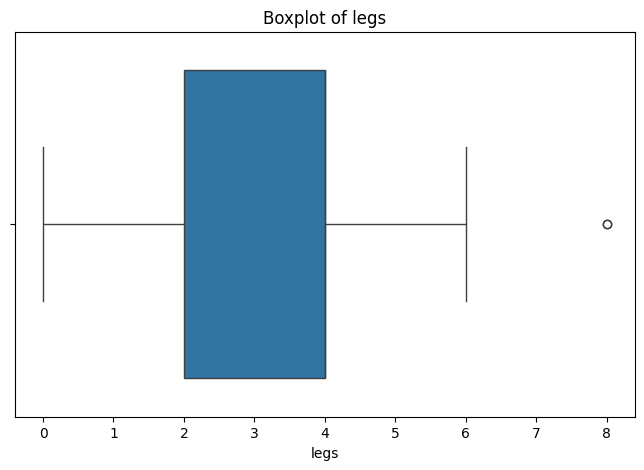

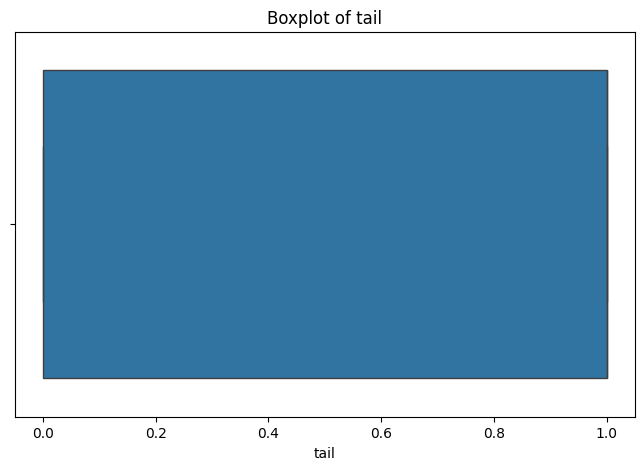

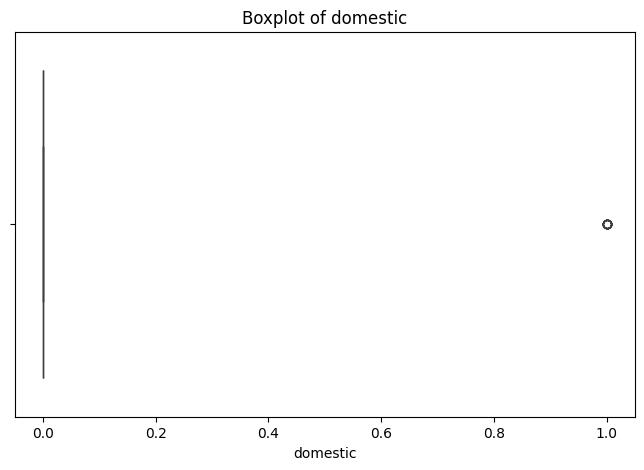

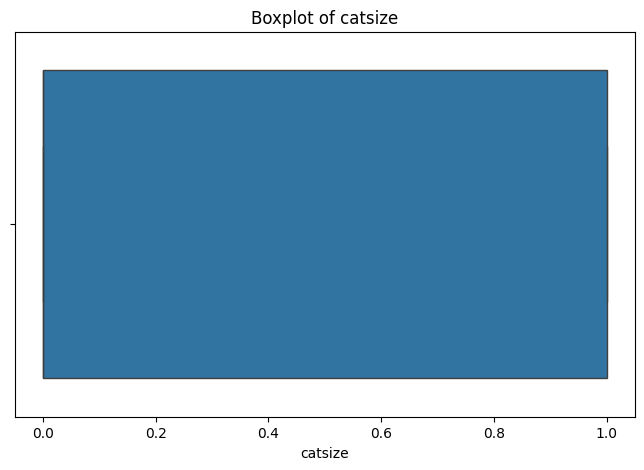

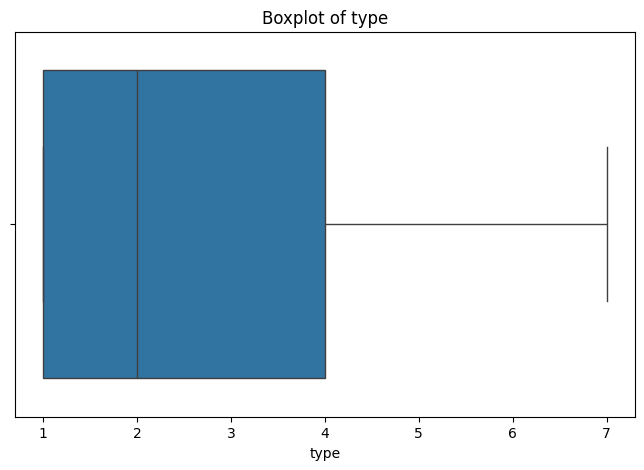

<ipython-input-7-25805e6b8ea3>:46: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local


Performance Metrics:
Accuracy: 0.9524
Precision: 0.9206
Recall: 0.9524
F1-Score: 0.9333

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import files

# Step 1: Upload the dataset in Google Colab
uploaded = files.upload()  # This will prompt you to upload the file

# Get the file name dynamically after upload
file_path = next(iter(uploaded))  # Get the first uploaded file path
data = pd.read_csv(file_path)

# Step 2: Data Analysis and Visualization
# Summary statistics
print("Dataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Visualizations
# Histograms for numerical features
data.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

# Boxplots for outlier detection
for column in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

# Step 3: Data Preprocessing
# Handle missing values by filling with the median for numerical columns
data.fillna(data.median(), inplace=True)

# Handle outliers using IQR method for numerical columns
for column in data.select_dtypes(include=[np.number]).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.clip(data[column], lower_bound, upper_bound)

# Split into features and target
X = data.drop(columns=['animal name', 'type'])  # 'animal name' is non-predictive
y = data['type']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Implement KNN
# Choose K value
k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(X_train, y_train)

# Step 6: Evaluate Classifier
y_pred = knn.predict(X_test)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Visualize Decision Boundaries
# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Retrain KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_pca.fit(X_train_pca, y_train)

# Visualize boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='viridis', edgecolor='k')
plt.title("KNN Decision Boundaries")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [ ]:
#INTERVIEW QUESTIONS

1)What are the key hyperparameters in KNN?

The key hyperparameters in KNN are as follows:

Number of Neighbors (k): This determines how many nearest neighbors are considered for making predictions. A smaller k might overfit the data,
 while a larger k can lead to underfitting. Choosing the right k is important and is often done using cross-validation.

Distance Metric: KNN uses distance to measure similarity. Common metrics include Euclidean (straight-line distance),
 Manhattan (sum of absolute differences), and Minkowski (a generalization of the first two). Choosing the right metric depends on the type of data and its structure.

Weights: Neighbors can contribute equally (uniform weights) or closer neighbors can have more influence (distance-based weights).
Distance-based weighting often improves accuracy.

Algorithm: KNN uses different algorithms to find neighbors, such as brute (simple but slow), kd_tree, and ball_tree (faster for specific data types).
The auto option selects the best algorithm automatically.

Leaf Size: For tree-based methods like kd_tree and ball_tree, this controls the size of tree leaves.
It affects the speed and accuracy of the model.

Power Parameter (p): This is used in the Minkowski distance. For example, p=1 gives Manhattan distance, and p=2 gives Euclidean distance.

Lastly, feature scaling (e.g., normalization) is essential in KNN because it relies on distance, and large-scale differences between features can distort results.
 Tuning these parameters and scaling features appropriately ensures the best performance for KNN.

2)What distance metrics can be used in KNN?

Euclidean Distance:
Measures the straight-line distance between two points.
Suitable for continuous and normalized data.

Manhattan Distance:
Sums the absolute differences between coordinates.
Ideal for high-dimensional or sparse data.

Minkowski Distance:
Generalizes Euclidean and Manhattan distances using a parameter 𝑝
Flexible metric depending on the choice of 𝑝

Cosine Similarity:
Measures the angle between two vectors.
Commonly used for text or sparse data.

Hamming Distance:
Counts the number of differences between binary or categorical data.
Useful for DNA sequences and text comparison.

Jaccard Distance:
Compares the dissimilarity between sets based on shared and total elements.
Suitable for preferences or binary data.

Chebyshev Distance:
Considers the maximum difference along any dimension.
Often applied in grid-like systems.